In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import seaborn as sns
import csv
import pickle
from collections import Counter
from IPython.display import display
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/glass.csv')

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

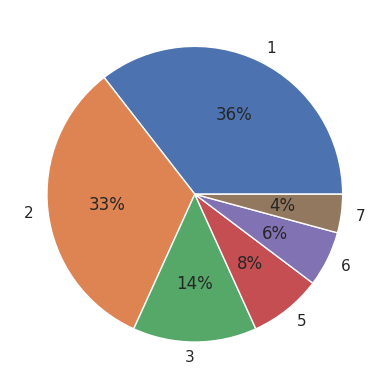

In [ ]:
#make pie chart viz
piechartdf = df['Type'].value_counts().to_frame()
labels = df['Type'].unique()
plt.pie(piechartdf['Type'].values, labels = labels, autopct = '%0.f%%')
plt.show()
#most are type 1 and 2

In [ ]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


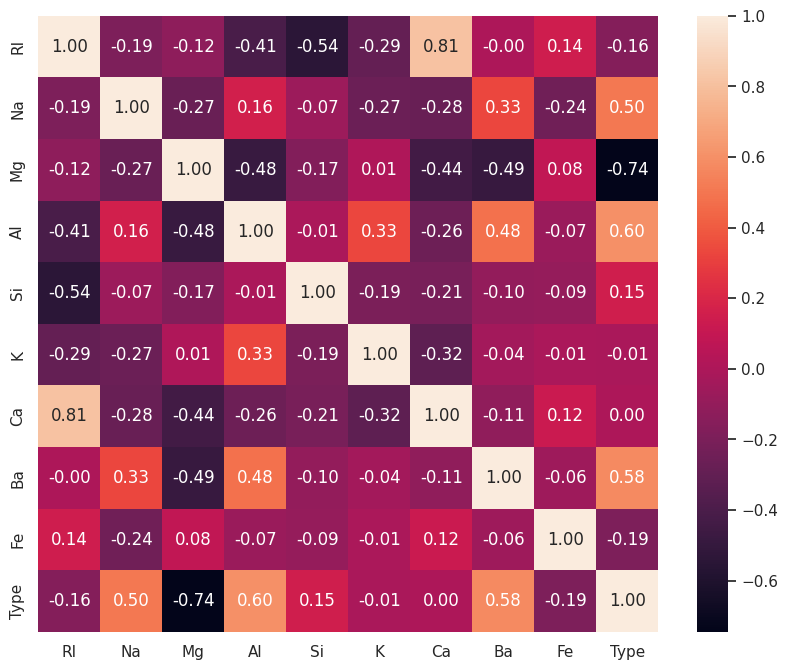

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()
#close correlations with refractive index and calcium (0.81)
#strong negative correlation with magnesium and type (-0.74)

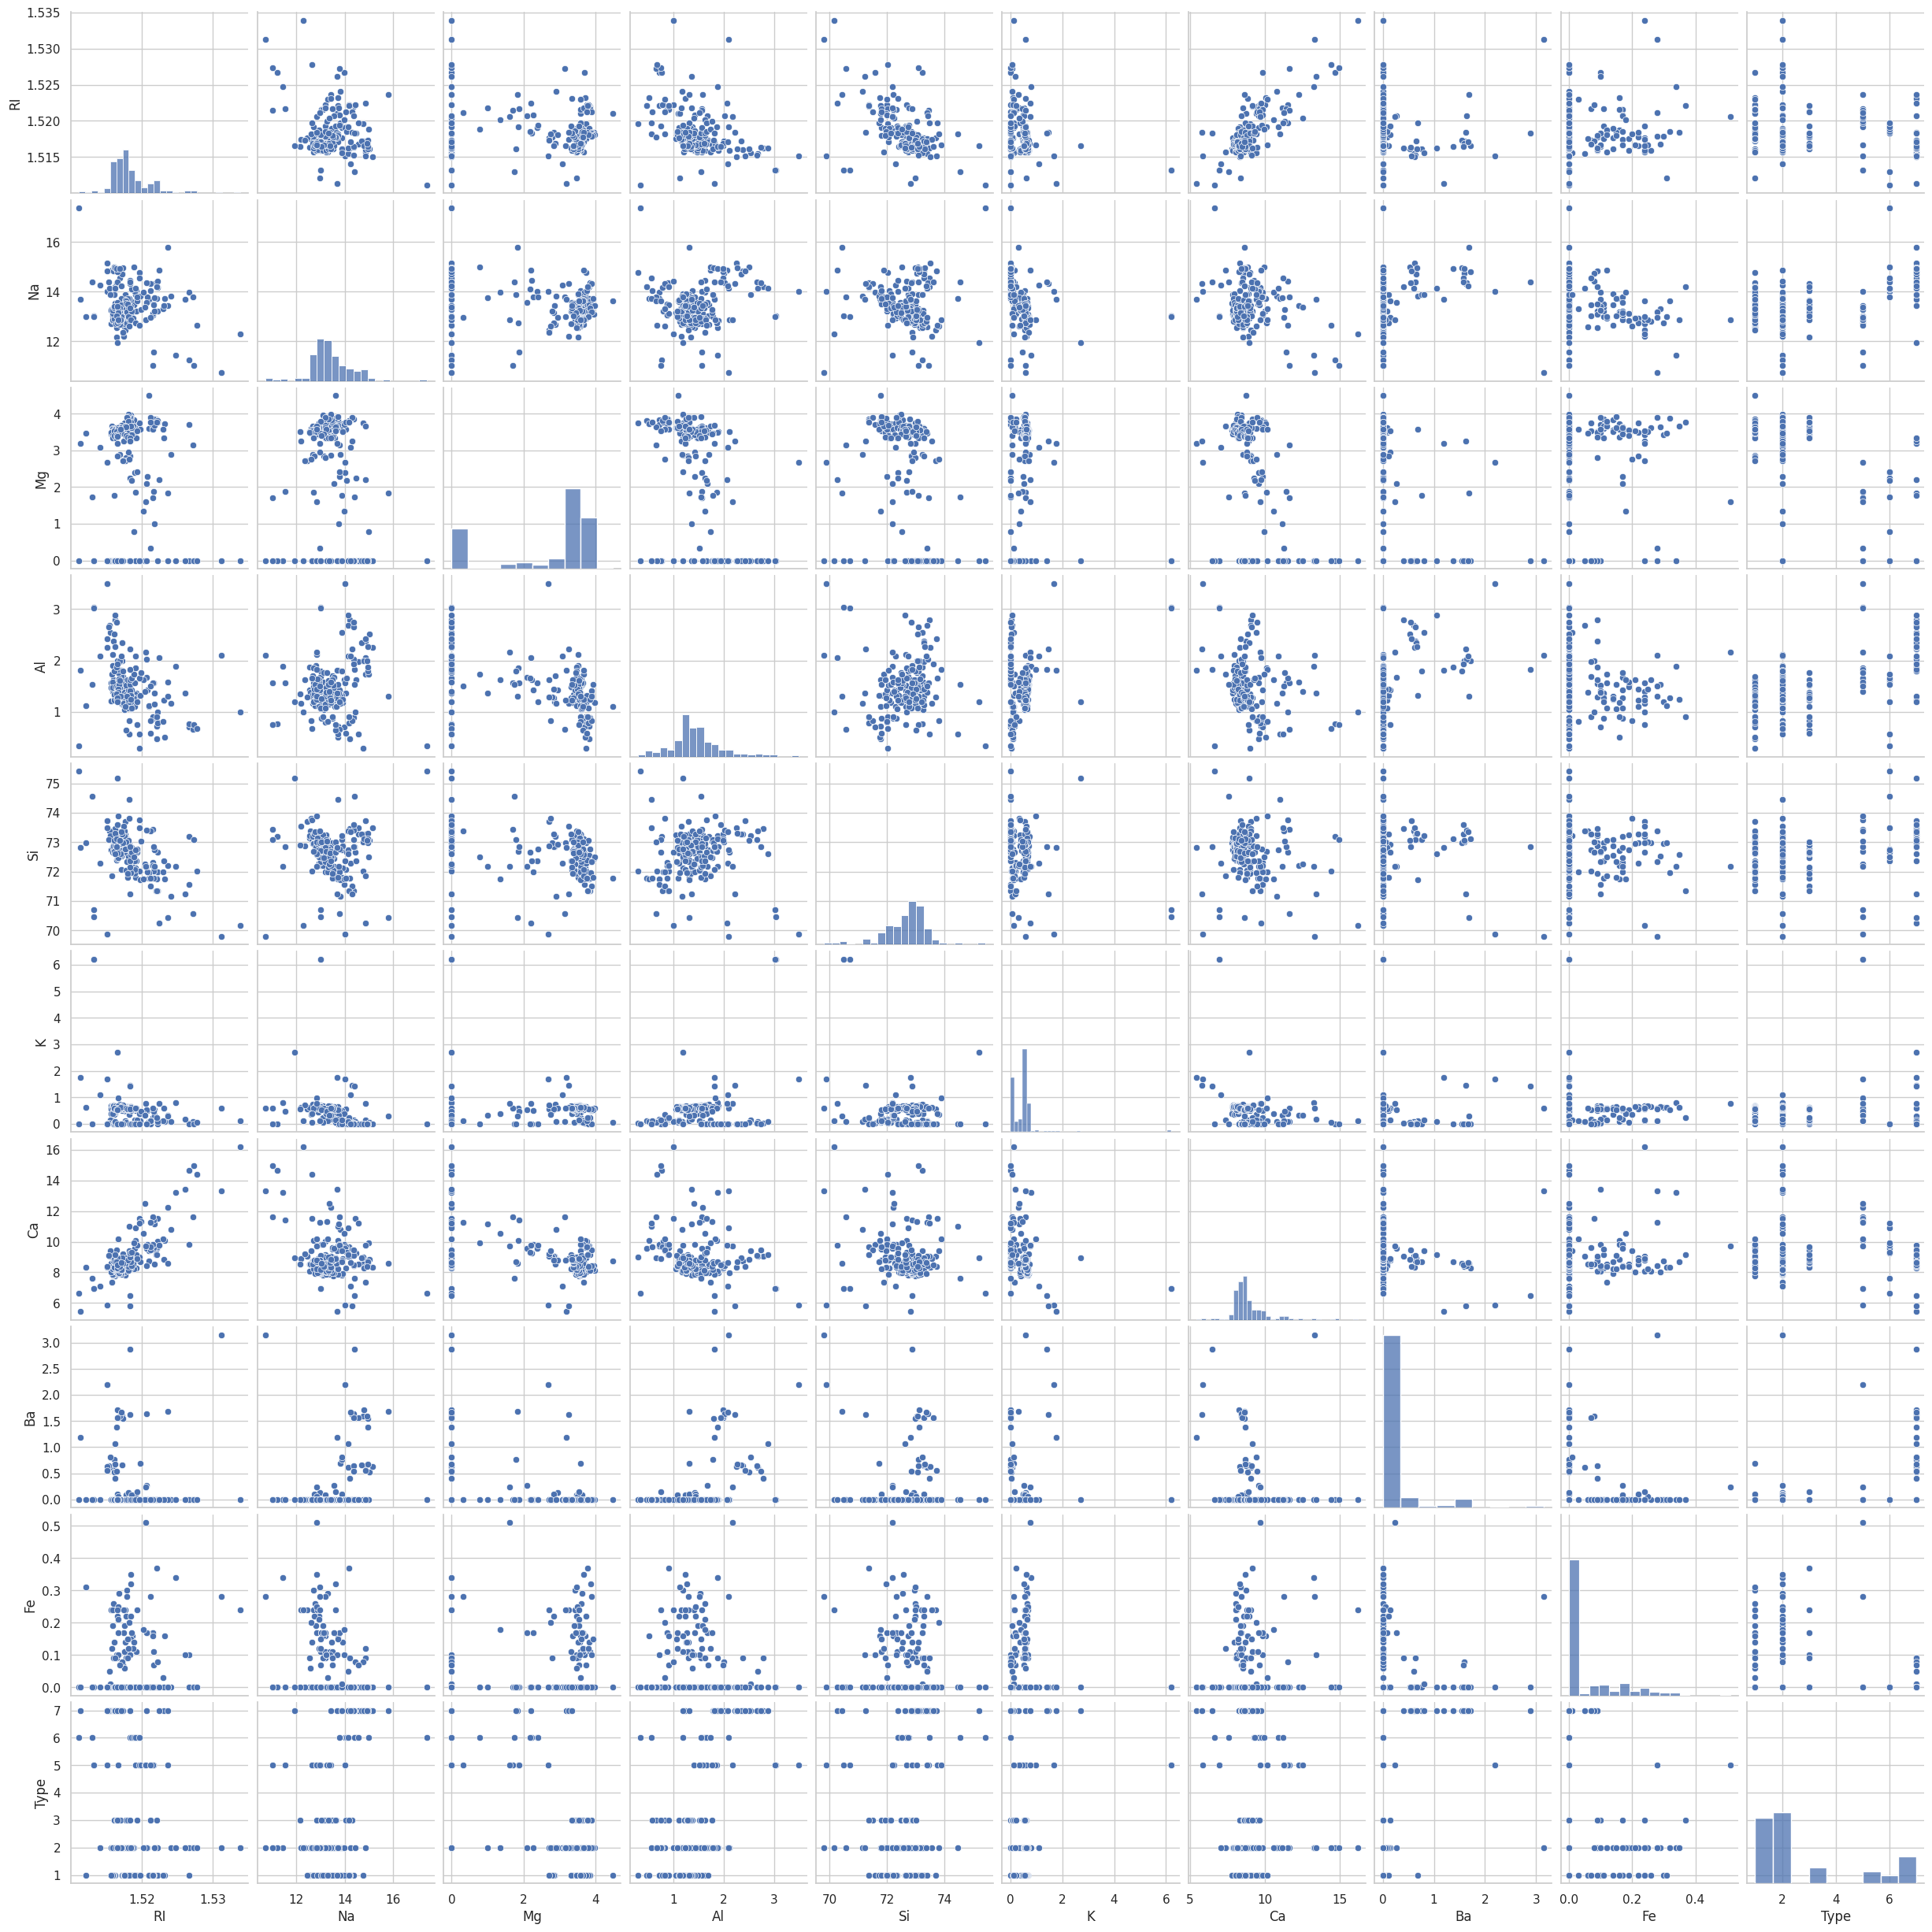

In [ ]:
fig = sns.pairplot(data=df)
plt.show()

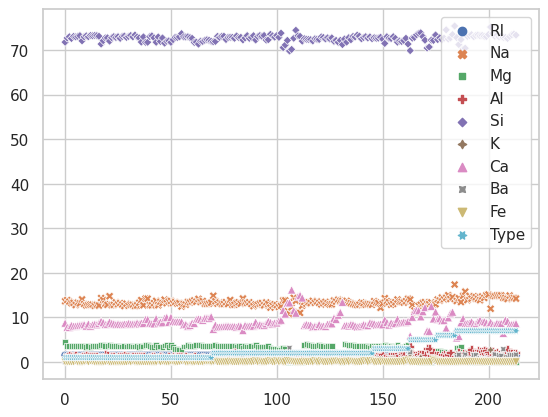

In [ ]:
fig = sns.scatterplot(data=df)
plt.show()

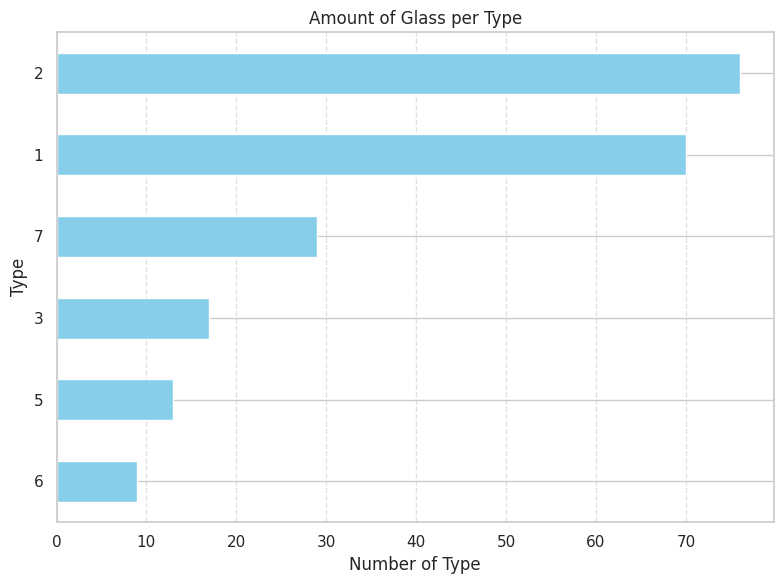

In [ ]:
# Get value counts for shapes and sort by count in descending order
type_counts = df['Type'].value_counts(ascending=True)  # Set ascending to False

# Determine the figure size based on the number of shapes to ensure they are all visible
num_type1 = len(type_counts)
fig_height = num_type1 * 0.5  # Adjust the multiplier for figure height

# Create a bar plot with shapes on the y-axis and count on the x-axis
plt.figure(figsize=(8, 6))  # Adjust the figure size based on the number of shapes
type_counts.plot(kind="barh", color='skyblue')  # Use "barh" for horizontal bar plot, and reverse the order
plt.xlabel('Number of Type')
plt.ylabel('Type')
plt.title('Amount of Glass per Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add a grid for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


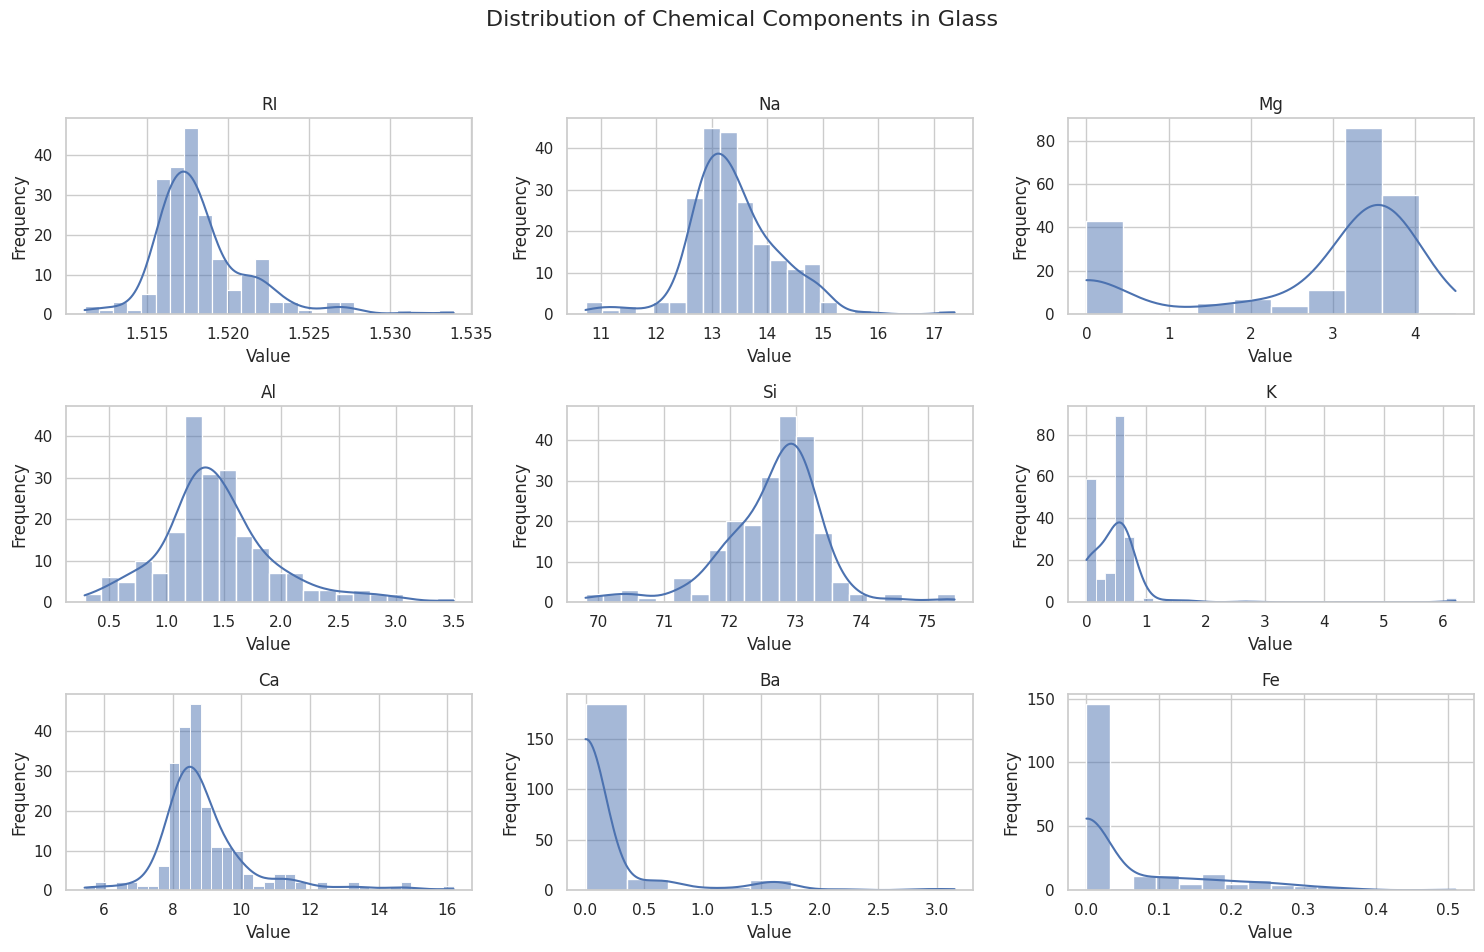

In [ ]:
sns.set(style = "whitegrid")
#histogram for each chemical compound
def plot_histograms(df):
  fig, axes = plt.subplots(nrows = 3, ncols=3, figsize = (15,10))
  fig.suptitle('Distribution of Chemical Components in Glass', fontsize=16)

  cols = df.columns[:-1]
  for col, ax in zip(cols, axes.flatten()):
    sns.histplot(df[col],kde=True,ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

  plt.tight_layout(rect=[0,0.03,1,0.95])
  return fig

#plot historgram
histograms = plot_histograms(df)
plt.show()

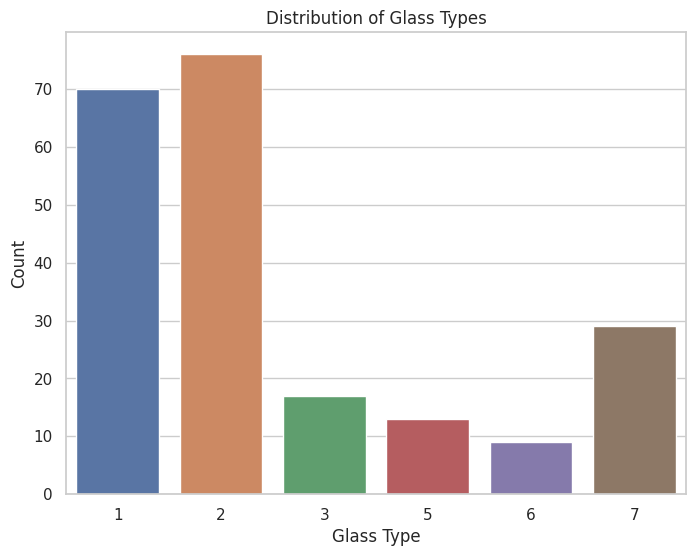

In [ ]:
#distribution of glass types
def plot_glass_types(df):
  plt.figure(figsize=(8,6))
  sns.countplot(data=df, x='Type')
  plt.title('Distribution of Glass Types')
  plt.xlabel('Glass Type')
  plt.ylabel('Count')
  return plt

glass_type_distribution = plot_glass_types(df)
plt.show()

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cols = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]

In [ ]:
x = df[cols]
y = df['Type'].values

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [ ]:
(x_train, x_test, y_train, y_test ) = train_test_split(x,y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
(x_train, x_cv, y_train, y_cv) = train_test_split(x_train, y_train, stratify=y_train, test_size=0.20, random_state=0)

In [ ]:
x_train.shape

(136, 9)

In [ ]:
y_train.shape

(136,)

In [ ]:
#Will scale to whatever we ask for a standardised range
scaling = MinMaxScaler()

In [ ]:
x_train = scaling.fit_transform(X=x_train)
x_cv = scaling.transform(X=x_cv)
x_test = scaling.transform(X=x_test)

In [ ]:


def tuning(classifier, dist, X, y):
  new_classifier = RandomizedSearchCV(estimator=classifier, random_state=0, param_distributions=dist, n_jobs=-1)
  search = new_classifier.fit(X=X, y=y)
  return search.best_params_


In [ ]:
lr_model = LogisticRegression(random_state=0)

lr_model = LogisticRegression()

In [ ]:
#Basic fit
lr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#increase iter
lr_model = LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
sig_lr = CalibratedClassifierCV(base_estimator=lr_model)
sig_lr.fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


CalibratedClassifierCV(base_estimator=LogisticRegression(max_iter=1000,
                                                         random_state=0))

In [ ]:
cv_pred = sig_lr.predict_proba(X=x_cv)

cv_loss = log_loss(y_true=y_cv, y_pred=cv_pred)

In [ ]:
cv_pred

array([[0.43906298, 0.34066793, 0.12089185, 0.02782088, 0.03754963,
        0.03400672],
       [0.32942196, 0.43332508, 0.09653765, 0.05500679, 0.03479395,
        0.05091458],
       [0.39450328, 0.35816716, 0.11995785, 0.04176822, 0.04221309,
        0.04339039],
       [0.31013587, 0.4562985 , 0.07486845, 0.06423414, 0.0431243 ,
        0.05133873],
       [0.34584153, 0.36498135, 0.13012471, 0.06132476, 0.04830949,
        0.04941815],
       [0.40983322, 0.37388166, 0.09198032, 0.03871823, 0.04088102,
        0.04470555],
       [0.42865507, 0.36292395, 0.09427701, 0.03335833, 0.04113469,
        0.03965096],
       [0.02227857, 0.13746058, 0.0232203 , 0.110979  , 0.09975076,
        0.60631079],
       [0.21188026, 0.42628637, 0.06131014, 0.15219744, 0.05224819,
        0.09607759],
       [0.40173898, 0.35196   , 0.11085186, 0.03516904, 0.05285669,
        0.04742343],
       [0.01247866, 0.14519999, 0.01826934, 0.18579339, 0.07912688,
        0.55913175],
       [0.43813003, 0

In [ ]:
prediction_cm_pred = sig_lr.predict(X=x_train)

In [ ]:
print(classification_report(y_true=y_train, y_pred=prediction_cm_pred))

              precision    recall  f1-score   support

           1       0.51      0.78      0.61        45
           2       0.50      0.50      0.50        48
           3       0.00      0.00      0.00        11
           5       1.00      0.25      0.40         8
           6       1.00      0.17      0.29         6
           7       0.94      0.83      0.88        18

    accuracy                           0.57       136
   macro avg       0.66      0.42      0.45       136
weighted avg       0.57      0.57      0.53       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#initialize the classifier
classifier = KNeighborsClassifier()

In [ ]:
dist = dict(n_neighbors=[3, 5, 10, 15, 21, 25, 31, 41, 99])
best_knn_model = tuning(classifier=classifier, dist=dist, X=x_train, y=y_train)

print("Best n_neighbours: {}".format(best_knn_model))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best n_neighbours: {'n_neighbors': 3}


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=best_knn_model['n_neighbors']).fit(X=x_train, y=y_train)

In [ ]:
sig_classifier = CalibratedClassifierCV(base_estimator=classifier).fit(X=x_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
prediction_cm_pred = sig_classifier.predict(X=x_train)

print(classification_report(y_true=y_train, y_pred=prediction_cm_pred))

              precision    recall  f1-score   support

           1       0.75      0.87      0.80        45
           2       0.77      0.90      0.83        48
           3       0.00      0.00      0.00        11
           5       0.83      0.62      0.71         8
           6       0.71      0.83      0.77         6
           7       1.00      0.78      0.88        18

    accuracy                           0.78       136
   macro avg       0.68      0.67      0.66       136
weighted avg       0.73      0.78      0.75       136



In [ ]:
prediction_cm_pred = sig_classifier.predict(X=x_test)

print(classification_report(y_true=y_test, y_pred=prediction_cm_pred))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.64      0.93      0.76        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         2
           7       0.80      0.67      0.73         6

    accuracy                           0.72        43
   macro avg       0.47      0.47      0.46        43
weighted avg       0.65      0.72      0.67        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rt = RandomForestClassifier(random_state = 30)

In [ ]:
classifier_rt = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=100, min_samples_split=5, random_state=30).fit(X=x_train, y=y_train)
sig_classifier_rt = CalibratedClassifierCV(base_estimator=classifier_rt).fit(X=x_train, y=y_train)
prediction_cm_pred = sig_classifier_rt.predict(X=x_train)

print(classification_report(y_true=y_train, y_pred=prediction_cm_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.96      0.98      0.97        45
           2       0.98      1.00      0.99        48
           3       1.00      0.91      0.95        11
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         6
           7       1.00      0.94      0.97        18

    accuracy                           0.98       136
   macro avg       0.99      0.97      0.98       136
weighted avg       0.98      0.98      0.98       136



In [ ]:
classifier_rt = RandomForestClassifier(n_estimators=250, criterion='log_loss', max_depth=100, min_samples_split=5, random_state=30)
classifier_rt.fit(X=x_train, y=y_train)
sig_classifier_rt = CalibratedClassifierCV(base_estimator=classifier_rt).fit(X=x_train, y=y_train)
prediction_cm_pred = sig_classifier_rt.predict(X=x_train)


#this is the test set testing
prediction = sig_classifier_rt.predict(X=x_test)

print(classification_report(y_true=y_test, y_pred=prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.82      0.93      0.87        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.81        43
   macro avg       0.70      0.72      0.71        43
weighted avg       0.78      0.81      0.79        43

